In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
import seaborn as sns

# loading data 

In [2]:
dates = pd.read_csv("dates.csv")
train = pd.read_csv("train (2).csv")
test = pd.read_csv("test (1).csv")
holidays = pd.read_csv("holidays.csv")
stores = pd.read_csv("stores.csv")
SampleSubmission = pd.read_csv("SampleSubmission.csv")

In [3]:
train.shape

(2248884, 6)

In [4]:
dates.head()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,1,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,1,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,1,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,1,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,1,1,5,6,5,1,1,False,False,False,False,False,False,101


In [5]:
holidays.head()

,date,type
0,1,0
1,5,4
2,12,4
3,42,0
4,43,0


In [6]:
stores=stores.rename(columns={'type':'Store_Type'})

In [7]:
train

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
0,365,store_1,category_24,0.000,0,0.0
1,365,store_1,category_21,0.000,0,0.0
2,365,store_1,category_32,0.000,0,0.0
3,365,store_1,category_18,0.000,0,0.0
4,365,store_1,category_26,0.000,0,0.0
...,...,...,...,...,...,...
2248879,1626,store_9,category_23,539.725,0,2141.0
2248880,1626,store_9,category_20,84.177,0,2141.0
2248881,1626,store_9,category_15,1973.760,3,2141.0
2248882,1626,store_9,category_29,2.000,0,2141.0


In [8]:
#merging all the datasets
data = pd.merge(train,stores, how='left', on = 'store_id')
data = pd.merge(data,dates, how='left', on = 'date')
data = pd.merge(data,holidays, how='left', on = 'date')

In [9]:
data

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,Store_Type,cluster,year,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type
0,365,store_1,category_24,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
1,365,store_1,category_21,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
2,365,store_1,category_32,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
3,365,store_1,category_18,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
4,365,store_1,category_26,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288083,1626,store_9,category_23,539.725,0,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN
2288084,1626,store_9,category_20,84.177,0,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN
2288085,1626,store_9,category_15,1973.760,3,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN
2288086,1626,store_9,category_29,2.000,0,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN


In [10]:
data.shape

(2288088, 24)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in ['is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end']:
    data[i] = le.fit_transform(data[i])

In [12]:
data_year = data['year']

In [13]:
data['date'].value_counts()

540     7128
904     5346
1269    5346
1277    3564
1409    3564
        ... 
787     1782
786     1782
785     1782
784     1782
1626    1782
Name: date, Length: 1262, dtype: int64

In [14]:
#data['type'] = data['type'].fillna(0)

In [15]:
data.describe()

,date,target,onpromotion,nbr_of_transactions,city,Store_Type,cluster,year,month,dayofmonth,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type
count,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,...,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,2.288088e+06,388476.000000
mean,9.963801e+02,3.942845e+02,3.151539e+00,1.576550e+03,6.981481e+00,1.592593e+00,7.296296e+00,2.269470e+00,6.099688e+00,1.563318e+01,...,2.484112e+01,2.369938e+00,3.348910e-02,3.193146e-02,1.090343e-02,1.012461e-02,3.115265e-03,2.336449e-03,2.514766e+02,1.637615
std,3.636077e+02,1.179737e+03,1.346699e+01,1.031196e+03,6.881245e+00,1.433960e+00,4.657252e+00,1.018812e+00,3.423991e+00,8.788368e+00,...,1.499148e+01,1.108337e+00,1.799100e-01,1.758177e-01,1.038487e-01,1.001105e-01,5.572756e-02,4.828033e-02,9.961182e+01,2.120643
min,3.650000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+02,0.000000
25%,6.817500e+02,0.000000e+00,0.000000e+00,9.450000e+02,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,...,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.460000e+02,0.000000
50%,9.975000e+02,1.500000e+01,0.000000e+00,1.339000e+03,6.500000e+00,2.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00,1.600000e+01,...,2.300000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.390000e+02,0.000000
75%,1.308250e+03,2.231933e+02,1.000000e+00,1.982000e+03,1.200000e+01,2.000000e+00,1.100000e+01,3.000000e+00,9.000000e+00,2.300000e+01,...,3.800000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.310000e+02,5.000000
max,1.626000e+03,1.247170e+05,7.410000e+02,8.359000e+03,2.100000e+01,4.000000e+00,1.600000e+01,4.000000e+00,1.200000e+01,3.100000e+01,...,5.300000e+01,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.240000e+02,5.000000


In [16]:
data.columns

Index(['date', 'store_id', 'category_id', 'target', 'onpromotion',
       'nbr_of_transactions', 'city', 'Store_Type', 'cluster', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'year_weekofyear', 'type'],
      dtype='object')

In [17]:
holidays = holidays.drop_duplicates(subset='date')

In [18]:
test_merged = pd.merge(test,stores, how='left', on = 'store_id')
test_merged = pd.merge(test_merged,dates, how='left', on = 'date')
test_merged = pd.merge(test_merged,holidays, how='left', on = 'date')

In [19]:
test

,date,store_id,category_id,onpromotion
0,1627,store_1,category_24,0
1,1627,store_1,category_21,0
2,1627,store_1,category_32,0
3,1627,store_1,category_18,16
4,1627,store_1,category_26,0
...,...,...,...,...
99787,1682,store_9,category_23,0
99788,1682,store_9,category_20,1
99789,1682,store_9,category_15,7
99790,1682,store_9,category_29,8


In [20]:
test_merged

,date,store_id,category_id,onpromotion,city,Store_Type,cluster,year,month,dayofmonth,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type
0,1627,store_1,category_24,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
1,1627,store_1,category_21,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
2,1627,store_1,category_32,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
3,1627,store_1,category_18,16,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
4,1627,store_1,category_26,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,1682,store_9,category_23,0,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN
99788,1682,store_9,category_20,1,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN
99789,1682,store_9,category_15,7,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN
99790,1682,store_9,category_29,8,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN


In [21]:
test_merged.columns

Index(['date', 'store_id', 'category_id', 'onpromotion', 'city', 'Store_Type',
       'cluster', 'year', 'month', 'dayofmonth', 'dayofweek', 'dayofyear',
       'weekofyear', 'quarter', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'year_weekofyear', 'type'],
      dtype='object')

In [22]:
test_merged['weekofyear'].value_counts()

25    12474
26    12474
27    12474
28    12474
29    12474
30    12474
31    12474
32    12474
Name: weekofyear, dtype: int64

In [23]:
test_merged['year'].value_counts()

4    99792
Name: year, dtype: int64

In [24]:
year_week_store_categorie = test_merged.groupby(by=['year_weekofyear','store_id','category_id']).median()

In [25]:
data = data.groupby(by=['year_weekofyear','store_id','category_id'],as_index=False).sum()

In [26]:
year_week_store_categorie

date  onpromotion  city  Store_Type  \
year_weekofyear store_id category_id                                          
425             store_1  category_0   1630.0          2.0   0.0         0.0   
                         category_1   1630.0          0.0   0.0         0.0   
                         category_10  1630.0          0.0   0.0         0.0   
                         category_11  1630.0          0.0   0.0         0.0   
                         category_12  1630.0         38.0   0.0         0.0   
...                                      ...          ...   ...         ...   
432             store_9  category_5   1679.0          0.0   0.0         1.0   
                         category_6   1679.0          0.0   0.0         1.0   
                         category_7   1679.0         65.0   0.0         1.0   
                         category_8   1679.0          3.0   0.0         1.0   
                         category_9   1679.0         22.0   0.0         1.0   

                                      cluster  year  month  dayofmonth  \
year_weekofyear store_id category_id                                     
425             store_1  category_0       0.0   4.0    6.0        22.0   
                         category_1       0.0   4.0    6.0        22.0   
                         category_10      0.0   4.0    6.0        22.0   
                         category_11      0.0   4.0    6.0        22.0   
                         category_12      0.0   4.0    6.0        22.0   
...                                       ...   ...    ...         ...   
432             store_9  category_5       4.0   4.0    8.0        10.0   
                         category_6       4.0   4.0    8.0        10.0   
                         category_7       4.0   4.0    8.0        10.0   
                         category_8       4.0   4.0    8.0        10.0   
                         category_9       4.0   4.0    8.0        10.0   

                                      dayofweek  dayofyear  weekofyear  \
year_weekofyear store_id category_id                                     
425             store_1  category_0         3.0      173.0        25.0   
                         category_1         3.0      173.0        25.0   
                         category_10        3.0      173.0        25.0   
                         category_11        3.0      173.0        25.0   
                         category_12        3.0      173.0        25.0   
...                                         ...        ...         ...   
432             store_9  category_5         3.0      222.0        32.0   
                         category_6         3.0      222.0        32.0   
                         category_7         3.0      222.0        32.0   
                         category_8         3.0      222.0        32.0   
                         category_9         3.0      222.0        32.0   

                                      quarter  is_month_start  is_month_end  \
year_weekofyear store_id category_id                                          
425             store_1  category_0       2.0             0.0           0.0   
                         category_1       2.0             0.0           0.0   
                         category_10      2.0             0.0           0.0   
                         category_11      2.0             0.0           0.0   
                         category_12      2.0             0.0           0.0   
...                                       ...             ...           ...   
432             store_9  category_5       3.0             0.0           0.0   
                         category_6       3.0             0.0           0.0   
                         category_7       3.0             0.0           0.0   
                         category_8       3.0             0.0           0.0   
                         category_9       3.0             0.0           0.0   

                                      is_quarter_start  is

In [27]:
data.columns

Index(['year_weekofyear', 'store_id', 'category_id', 'date', 'target',
       'onpromotion', 'nbr_of_transactions', 'city', 'Store_Type', 'cluster',
       'year', 'month', 'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear',
       'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end', 'type'],
      dtype='object')

In [28]:
data['store_id'] = data['store_id'].replace("store_","",regex=True).astype(int)
data['category_id'] = data['category_id'].replace("category_","",regex=True).astype(int)
test_merged['store_id'] = test_merged['store_id'].replace("store_","",regex=True).astype(int)
test_merged['category_id'] = test_merged['category_id'].replace("category_","",regex=True).astype(int)

In [29]:
data = data.drop('nbr_of_transactions',axis=1)

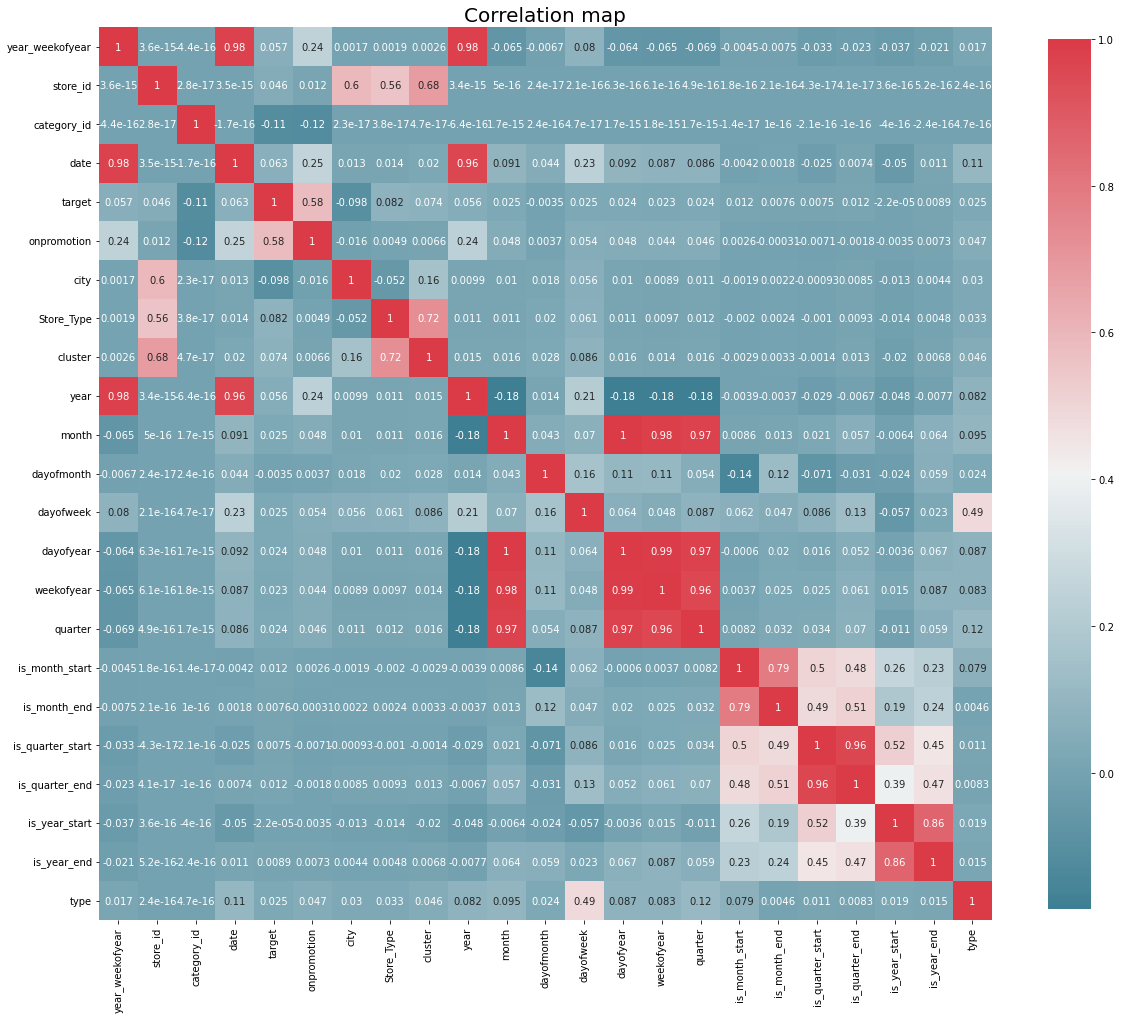

In [30]:
#corrolation map
import matplotlib.pyplot as plt
import seaborn as sns
def plot_mask_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 20, 20) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    plt.title('Correlation map',fontsize = 20)
    s = sns.heatmap(
        corr, 
        cmap=cmap,
        square=True, 
        cbar_kws={ 'shrink' : .8}, 
        ax=ax, 
        annot = True
        ) 
plot_mask_correlation_map(data)

# Modeling

In [31]:
data.columns

Index(['year_weekofyear', 'store_id', 'category_id', 'date', 'target',
       'onpromotion', 'city', 'Store_Type', 'cluster', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'type'],
      dtype='object')

In [32]:
features=['store_id','category_id','year_weekofyear','Store_Type','city']

In [33]:
data

,year_weekofyear,store_id,category_id,date,target,onpromotion,city,Store_Type,cluster,year,...,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,type
0,101,1,0,4016,137.000000,0,0,0,0,8,...,1107,8,17,1,1,1,1,1,1,2.0
1,101,1,1,4016,14.000000,0,0,0,0,8,...,1107,8,17,1,1,1,1,1,1,2.0
2,101,1,10,4016,146.665599,0,0,0,0,8,...,1107,8,17,1,1,1,1,1,1,2.0
3,101,1,11,4016,46.000000,0,0,0,0,8,...,1107,8,17,1,1,1,1,1,1,2.0
4,101,1,12,4016,2460.688700,5,0,0,0,8,...,1107,8,17,1,1,1,1,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322537,424,9,5,11361,0.000000,0,0,7,28,28,...,1162,168,14,0,0,0,0,0,0,0.0
322538,424,9,6,11361,33.000000,0,0,7,28,28,...,1162,168,14,0,0,0,0,0,0,0.0
322539,424,9,7,11361,44267.406000,577,0,7,28,28,...,1162,168,14,0,0,0,0,0,0,0.0
322540,424,9,8,11361,461.000000,23,0,7,28,28,...,1162,168,14,0,0,0,0,0,0,0.0


In [34]:
test_merged.shape

(99792, 22)

In [35]:
train_x = data[features]
train_y = data['target']

In [36]:
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size = 0.25, random_state = 123)

In [37]:
def evaluate_model(model,x_test,y_test):
    y_pred = model.predict(x_test)
    print('R2 = ',r2_score(y_test, y_pred))
    print('MAE = ',mean_absolute_error(y_test, y_pred))
    print('MSE = ',mean_squared_error(y_test, y_pred))
    print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Meadian = ', median_absolute_error(y_test, y_pred))

In [38]:
"""from sklearn.neighbors import KNeighborsRegressor
model = xg.XGBRegressor(learning_rate = 0.3,n_estimators = 10,max_depth=8)
model.fit(train_X, train_Y)
evaluate_model(model,test_X,test_Y)"""

'from sklearn.neighbors import KNeighborsRegressor\nmodel = xg.XGBRegressor(learning_rate = 0.3,n_estimators = 10,max_depth=8)\nmodel.fit(train_X, train_Y)\nevaluate_model(model,test_X,test_Y)'

## Tested models

In [39]:
#pip install lightgbm

In [40]:
# laoding data
#lgb_train = lgb.Dataset(train_X, train_Y)
#lgb_eval = lgb.Dataset(test_X, test_Y)

In [41]:
"""# defining parameters
import lightgbm as lgb
params = {
    'task': 'train', 
   # 'boosting': 'gbdt',
    'objective': 'regression',
    #'num_leaves': 10,
    #'learnnig_rage': 0.3,
    'metric': {'l2','l1'},
    #'verbose': -1
}
lgbm = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval
                )
evaluate_model(lgbm,test_X,test_Y)
pred3 = lgbm.predict(test_X)"""

"# defining parameters\nimport lightgbm as lgb\nparams = {\n    'task': 'train', \n   # 'boosting': 'gbdt',\n    'objective': 'regression',\n    #'num_leaves': 10,\n    #'learnnig_rage': 0.3,\n    'metric': {'l2','l1'},\n    #'verbose': -1\n}\nlgbm = lgb.train(params,\n                 train_set=lgb_train,\n                 valid_sets=lgb_eval\n                )\nevaluate_model(lgbm,test_X,test_Y)\npred3 = lgbm.predict(test_X)"

In [42]:
#decision tree model
"""#import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train_X, train_Y)
evaluate_model(regressor,test_X,test_Y)"""

'#import the regressor\nfrom sklearn.tree import DecisionTreeRegressor \n  \n# create a regressor object\nregressor = DecisionTreeRegressor(random_state = 0) \n  \n# fit the regressor with X and Y data\nregressor.fit(train_X, train_Y)\nevaluate_model(regressor,test_X,test_Y)'

In [43]:
#xgboost model
"""from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
stack = StackingCVRegressor(regressors=(rf,model),
                            cv=12,
                            meta_regressor=regressor,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=1)
stack.fit(train_X, train_Y)
evaluate_model(rf,test_X,test_Y)"""

'from mlxtend.regressor import StackingCVRegressor\nfrom xgboost import XGBRegressor \nfrom sklearn.linear_model import Lasso\nstack = StackingCVRegressor(regressors=(rf,model),\n                            cv=12,\n                            meta_regressor=regressor,\n                            use_features_in_secondary=True,\n                            store_train_meta_features=True,\n                            shuffle=False,\n                            random_state=1)\nstack.fit(train_X, train_Y)\nevaluate_model(rf,test_X,test_Y)'

In [44]:
from sklearn.ensemble import RandomForestRegressor

#tested parameters
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}
# Create and train model
rf = RandomForestRegressor(random_state = 0)
rf.fit(train_X, train_Y)
# Predict on test data
evaluate_model(rf,test_X,test_Y)

R2 =  0.9650303130616367
MAE =  302.4914475005832
MSE =  2230775.173994751
RMSE =  1493.5779772059948
Meadian =  17.429570000000894


In [45]:
#pip install mlxtend

In [46]:
#pred = model.predict(test_X)

In [47]:
#pred2 = regressor.predict(test_X)

## Target_prediction

In [48]:
test_merged

,date,store_id,category_id,onpromotion,city,Store_Type,cluster,year,month,dayofmonth,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type
0,1627,1,24,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
1,1627,1,21,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
2,1627,1,32,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
3,1627,1,18,16,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
4,1627,1,26,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,1682,9,23,0,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN
99788,1682,9,20,1,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN
99789,1682,9,15,7,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN
99790,1682,9,29,8,0,1,4,4,8,13,...,32,3,False,False,False,False,False,False,432,NaN


In [49]:
year_week_store_categorie = test_merged.groupby(by=['year_weekofyear','store_id','category_id'],as_index=False).sum()

In [50]:
year_week_store_categorie=year_week_store_categorie[features]

In [51]:
pred = rf.predict(year_week_store_categorie)

In [52]:
pred2 = np.log(pred+1)

In [53]:
year_week_store_categorie['target'] = pred2

In [54]:
test_merged.head()

,date,store_id,category_id,onpromotion,city,Store_Type,cluster,year,month,dayofmonth,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type
0,1627,1,24,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
1,1627,1,21,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
2,1627,1,32,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
3,1627,1,18,16,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
4,1627,1,26,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN


In [55]:
year_week_store_categorie.head()

,store_id,category_id,year_weekofyear,Store_Type,city,target
0,1,0,425,0,0,5.404073
1,1,1,425,0,0,2.794839
2,1,2,425,0,0,4.626736
3,1,3,425,0,0,4.817212
4,1,4,425,0,0,6.804043


In [56]:
year_week_store_categorie["ID"] ='year_week_'+ year_week_store_categorie["year_weekofyear"].astype(str) + "_store_" + year_week_store_categorie["store_id"].astype(str) + "_category_" + year_week_store_categorie["category_id"].astype(str)

In [57]:
year_week_store_categorie.head()

,store_id,category_id,year_weekofyear,Store_Type,city,target,ID
0,1,0,425,0,0,5.404073,year_week_425_store_1_category_0
1,1,1,425,0,0,2.794839,year_week_425_store_1_category_1
2,1,2,425,0,0,4.626736,year_week_425_store_1_category_2
3,1,3,425,0,0,4.817212,year_week_425_store_1_category_3
4,1,4,425,0,0,6.804043,year_week_425_store_1_category_4


In [58]:
first_submission = year_week_store_categorie[['ID','target']]

In [59]:
first_submission['target'].mean()

5.401912213993983

In [60]:
first_submission[first_submission['target'] == 0].head()

,ID,target
21,year_week_425_store_1_category_21,0.0
170,year_week_425_store_6_category_5,0.0
186,year_week_425_store_6_category_21,0.0
290,year_week_425_store_9_category_26,0.0
322,year_week_425_store_10_category_25,0.0


In [61]:
first_submission.isnull().sum()

ID        0
target    0
dtype: int64

In [62]:
#first_submission.fillna(2,inplace=True)

In [63]:
for i in range(len(first_submission)):
    if first_submission['target'][i] < 0:
        first_submission['target'][i] = 0  

In [64]:
first_submission.to_csv('sub57.csv',index=False)